In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Laoding the dataset
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### Data_Description
label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn : mobile number of user

aon : age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date

In [3]:
#checking null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


From the above we can see that the Aon has outliers as max value is too high and min value is negative which is not possible, for all the features we can see that the min value is negative which is not even possible for most of the features like daily recharge and main account balance, and last recharge can't be negative.

### EDA

In [6]:
#Creating balance Groups for our visiualization
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [7]:
# Mapping balance groups with precentage value with respect to label 
count_balance_response = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum()*100)
count_balance_response = count_balance_response.transpose()

In [8]:
count_balance_response

label,0,1
balance_group,,
average balance,9.436834,90.563166
high balance,0.000000,100.000000
low balance,11.276328,88.723672
no balance,30.710929,69.289071


In [9]:
bal = pd.DataFrame(df['balance_group'].value_counts())
bal['subscription%'] = count_balance_response[1]
bal.drop('balance_group',axis=1,inplace=True)
bal['bal']= [1,0,2,3]
bal = bal.sort_values('bal',ascending = True)

In [10]:
bal

,subscription%,bal
no balance,69.289071,0
low balance,88.723672,1
average balance,90.563166,2
high balance,100.000000,3


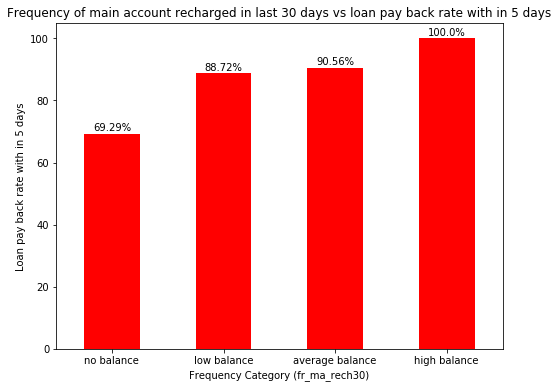

In [11]:
## Plotting the graph
plot_fre = bal['subscription%'].plot(kind = 'bar',
                                               color = ('Red'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      bal['subscription%'].round(2).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

From the above we can see that users with high balance always pays back the loan within 5 days and average and low category only 9% - 12% users failed to payback the loan within 5%, and users with zero balance around 30% users are not paying the loan back within 5 days.

In [12]:
#Creating Frequency Groups for our visiualization
lst1 = [df]
for column in lst1:
    column.loc[column['fr_ma_rech30'] <=0, 'frequency_group'] = 'no_frequency'
    column.loc[(column['fr_ma_rech30'] >0) & (column['fr_ma_rech30'] >=1), 'frequency_group'] = 'low_frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] >=2), 'frequency_group'] = 'avg_frequency'
    column.loc[column['fr_ma_rech30'] >2, 'frequency_group'] = 'high_frequency'
    

In [13]:
#mapping the frequency groups
count_freq_response=pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum()*100)
count_freq_response=count_freq_response.transpose()
count_freq_response

label,0,1
frequency_group,,
avg_frequency,3.787999,96.212001
high_frequency,5.481040,94.518960
low_frequency,4.304873,95.695127
no_frequency,24.870684,75.129316


In [14]:
##Creating seperate samll dataframe for visualization
freq= pd.DataFrame(df['frequency_group'].value_counts())
freq['subs%']= count_freq_response[1]
freq.drop('frequency_group', axis=1, inplace= True)
freq['Freq'] = [3,0,1,2]
freq = freq.sort_values('Freq', ascending= True)
freq

,subs%,Freq
no_frequency,75.129316,0
low_frequency,95.695127,1
avg_frequency,96.212001,2
high_frequency,94.518960,3


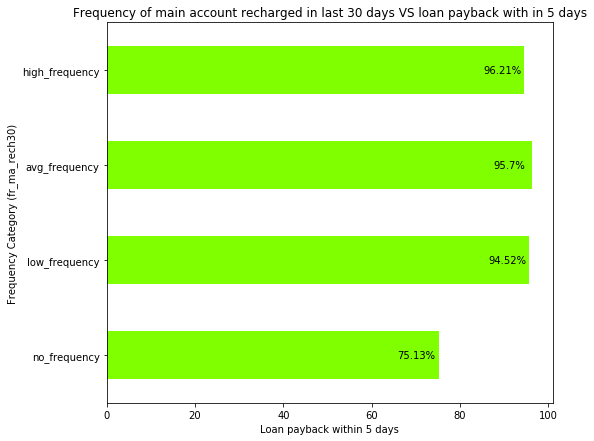

In [15]:
## plotting the graph
plot_freq = freq['subs%'].plot(kind='barh', color = ('chartreuse'), figsize = (8,7))
plt.title('Frequency of main account recharged in last 30 days VS loan payback with in 5 days')
plt.ylabel('Frequency Category (fr_ma_rech30)')
plt.xlabel('Loan payback within 5 days')
plt.xticks(rotation= 'horizontal')
## Labeling the bar
for re, label in zip(plot_freq.patches,freq['subs%'].sort_values(ascending = True).round(2).astype(str)):
    plot_freq.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'black')

From the above we can see there are no 100% rate in any frequency group to payback the loan within 5 days, and all average low and high frequency have atleast 6% to 4% users didn't payback the loan within 5 days.

Comming to user have no frequency 25% users didn't payback the loan with in 5 days, till now we can see that users with no balance and no frequency are costing huge losses, company should implement some kind of strategies to reduce that like send SMS alerts for notification.

In [16]:
## Creating Frequency Group for number of loan amounts
lst2= [df]
for column in lst2:
    column.loc[column['cnt_loans30'] <=0, 'loan_freq_group'] = 'no_loan'
    column.loc[(column['cnt_loans30'] >0) & (column['cnt_loans30'] <=1), 'loan_freq_group'] = 'low_loan'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_freq_group'] = 'avg_loan'
    column.loc[(column['cnt_loans30'] >4), 'loan_freq_group'] = 'high_loan'

In [17]:
## mapping the laon Frequency groups to dataframe
count_loan_response=pd.crosstab(df['label'],df['loan_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan_response=count_loan_response.transpose()
count_loan_response

label,0,1
loan_freq_group,,
avg_loan,6.401495,93.598505
high_loan,1.619592,98.380408
low_loan,23.972816,76.027184
no_loan,0.000000,100.000000


In [18]:
##Creating seperate samll dataframe for visualization
loan_freq = pd.DataFrame(df['loan_freq_group'].value_counts())
loan_freq['subs%'] = count_loan_response[1]
loan_freq.drop('loan_freq_group',axis=1, inplace=True)
loan_freq['freq']=[2,3,1,0]
loan_freq=loan_freq.sort_values('freq',ascending = True)

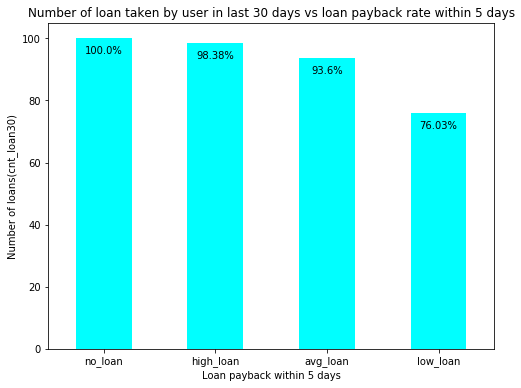

In [19]:
## plotting the graph
plot_freq1= loan_freq['subs%'].plot(kind= 'bar', color = ('cyan'), figsize=(8,6))
plt.title('Number of loan taken by user in last 30 days vs loan payback rate within 5 days')
plt.xlabel('Loan payback within 5 days')
plt.ylabel('Number of loans(cnt_loan30)')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq1.patches,
                    loan_freq['subs%'].round(2).astype(str)):
    plot_freq1.text(re.get_x() + re.get_width()/2,
                   re.get_height()-5,
                    label+'%',
                    ha='center',
                    color='black')
                   


From the we can see that majority user who took high loans in last 30 days are more likely to payback with in 5 days and 1.62% users failed to payback within 5 days, and among average loan user 7% users failed to payback the loan within 5 days, and users with low loan have 24% didn't payback as expected might be defaulted. 

In [20]:
## Creating Frequency Group for number of loan amounts in 90 days
lst3= [df]
for column in lst3:
    column.loc[column['amnt_loans90'] <=0, 'loan90_freq_group'] = 'no_loan'
    column.loc[(column['amnt_loans90'] >0) & (column['amnt_loans90'] <=6), 'loan90_freq_group'] = 'low_loan'
    column.loc[(column['amnt_loans90'] >6) & (column['amnt_loans90'] <=30), 'loan90_freq_group'] = 'medium_loan'
    column.loc[column['amnt_loans90'] >30, 'loan90_freq_group'] = 'high_loan'

In [21]:
## mapping the laon Frequency groups to dataframe
count_loan90_response=pd.crosstab(df['label'],df['loan90_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan90_response=count_loan90_response.transpose()
count_loan90_response

label,0,1
loan90_freq_group,,
high_loan,1.432771,98.567229
low_loan,27.262733,72.737267
medium_loan,7.197224,92.802776
no_loan,0.000000,100.000000


In [22]:
##Creating seperate samll dataframe for visualization
loan90_freq = pd.DataFrame(df['loan90_freq_group'].value_counts())
loan90_freq['subs%'] = count_loan_response[1]
loan90_freq.drop('loan90_freq_group',axis=1, inplace=True)
loan90_freq['freq']=[3,1,2,0]
loan90_freq=loan_freq.sort_values('freq',ascending = True)

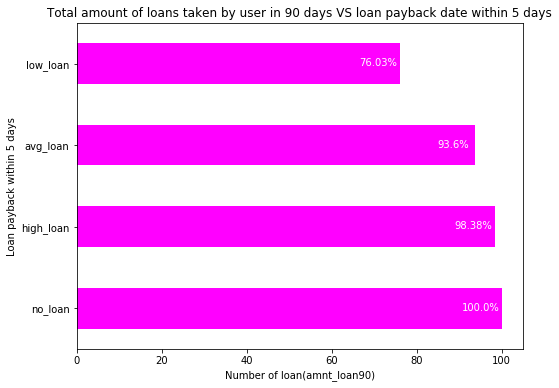

In [23]:
## Plotting the graph
plot_freq2= loan90_freq['subs%'].plot(kind='barh', color=('magenta'), figsize=(8,6))
plt.title('Total amount of loans taken by user in 90 days VS loan payback date within 5 days')
plt.xlabel('Number of loan(amnt_loan90)')
plt.ylabel('Loan payback within 5 days')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq2.patches,loan90_freq['subs%'].sort_values(ascending = False).round(2).astype(str)):
    plot_freq2.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'white')
                                      

From the we can see that we can observe almost same results for the loan amount taken in 30 days.

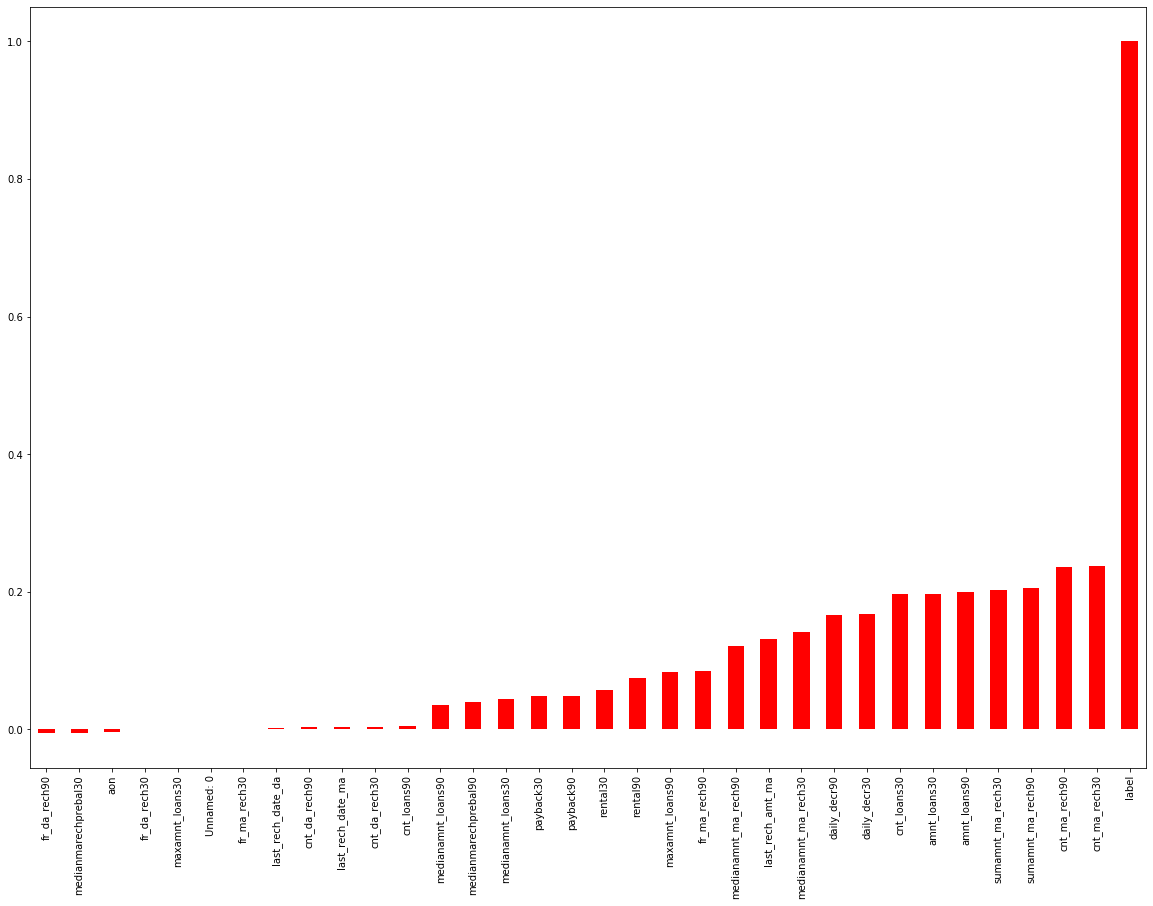

In [24]:
plt.figure(figsize = (20,14))
df.corr()['label'].sort_values().plot(kind ='bar',color='red')

In [25]:
# Checking the label corelation with other features
df.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
Unnamed: 0              0.000403
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma

From the above we can see that there are few features which are not necessary with respect to label, so we can drop them.

In [26]:
## Dropping the negative correlated feautres and extra features created for visualization
df.drop(['msisdn', 'pcircle', 'pdate','fr_da_rech90', 'medianmarechprebal30', 'aon', 'fr_da_rech30', 'maxamnt_loans30', 'Unnamed: 0', 'balance_group', 'frequency_group', 'loan_freq_group','loan90_freq_group'],axis=1,inplace=True)
#f.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_freq_group','loan90_freq_group'],axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  cnt_ma_rech90         209593 non-null  int64  
 13  fr_ma_rech90          209593 non-null  int64  
 14  sumamnt_ma_rech90     209593 non-null  int64  
 15  

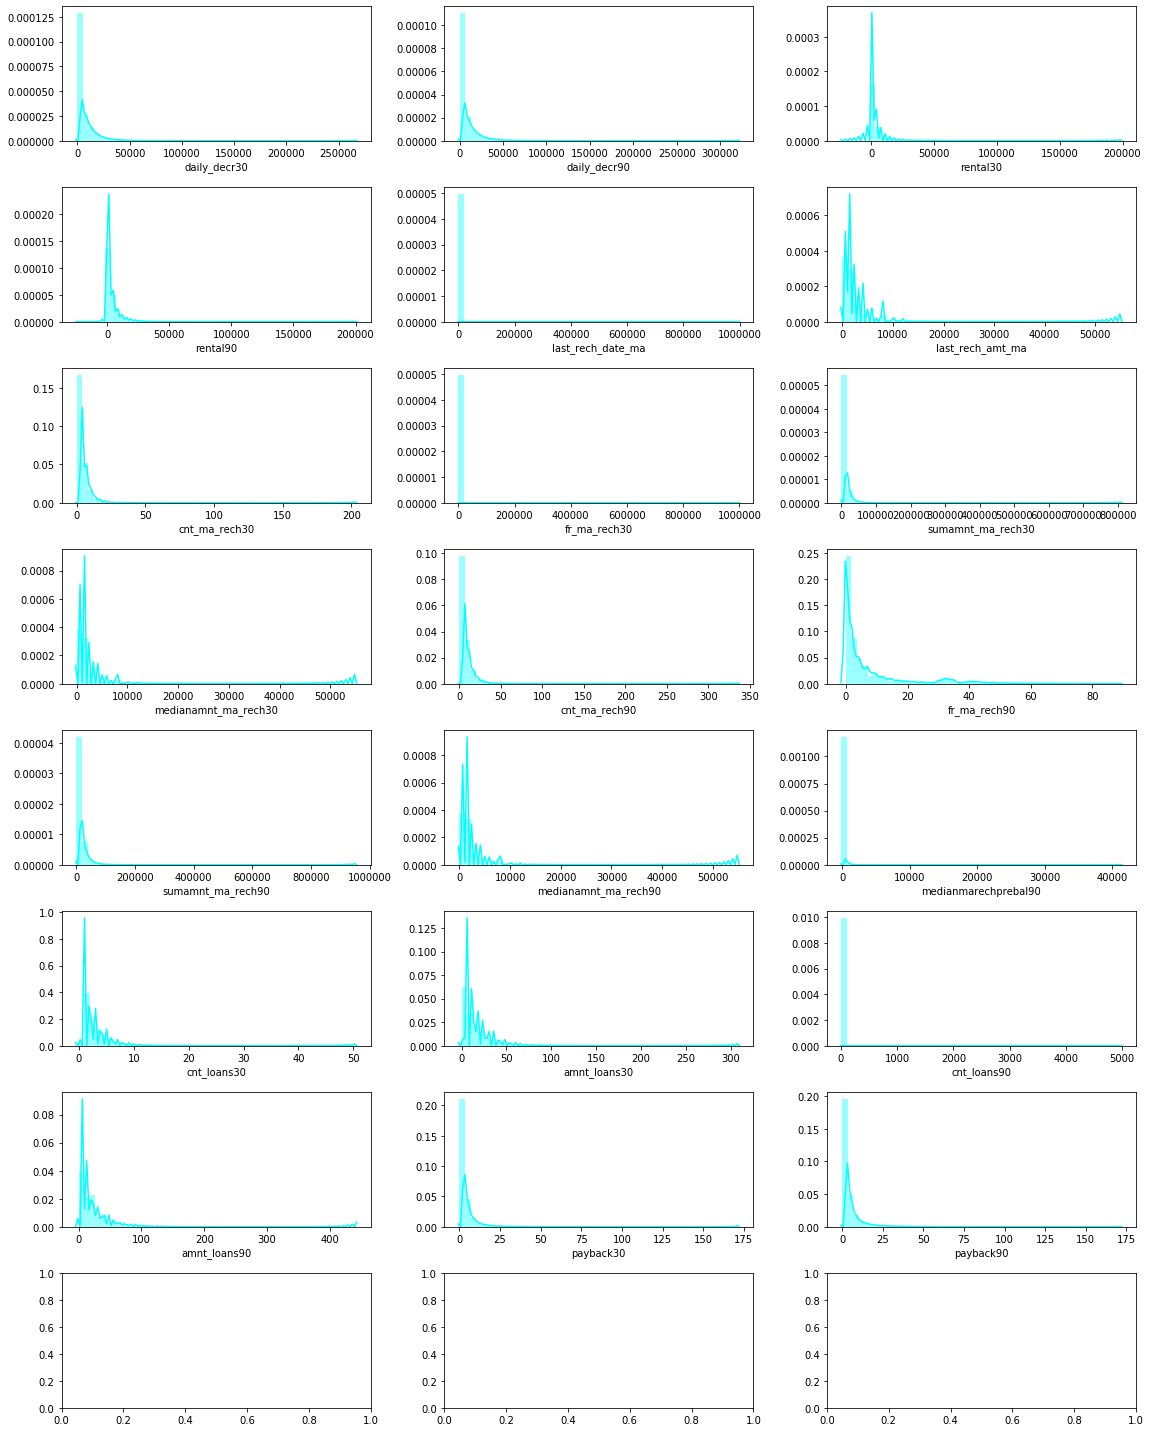

In [28]:
columns=['daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
         'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90','sumamnt_ma_rech90', 
         'medianamnt_ma_rech90', 'medianmarechprebal90','cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='cyan')
plt.tight_layout()
plt.show()

From the above we can see that most of the data is rightly skewed and there are multiple outliers in most of the features, so we have to deal with these outliers.

For this dataset i would chose outlier imputation technique for the features whose z-score>3, mean imputing, and also applied cube root to bring the data closer to normal distribution.

In [29]:
## Imputting outliers
from scipy.stats import zscore
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[1]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>3 or df[columns[i]][j]<-3:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
    df[columns[i]]=np.cbrt((df[columns[i]]))

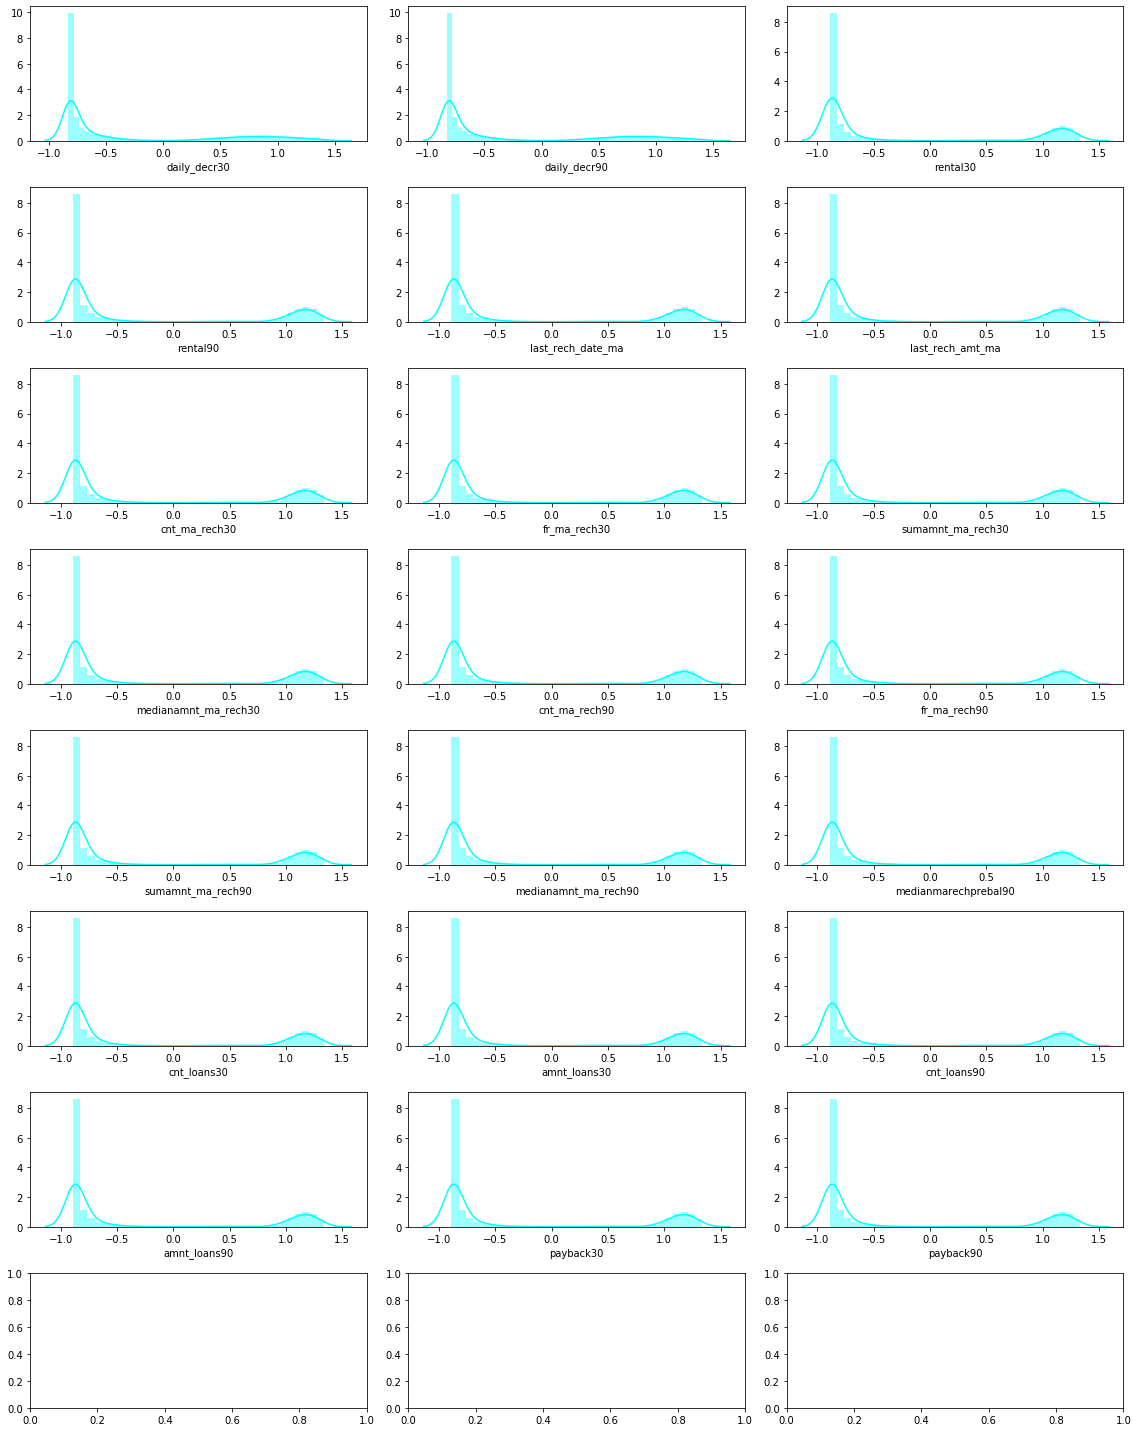

In [30]:
## Checking distribution again
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='cyan')
plt.tight_layout()
plt.show()

1    183431
0     26162
Name: label, dtype: int64


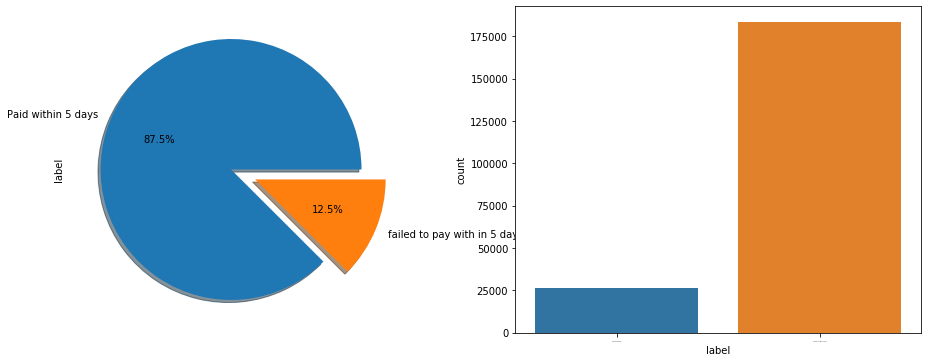

In [31]:
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Paid within 5 days', 'failed to pay with in 5 days']
df['label'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('label', data=df, ax=ax[1])
ax[1].set_xticklabels(['Paid within 5 days', 'failed to pay with in 5 days'], fontsize=0)
plt.show()

From the above we can see that the dataset is highly imbalanced as 87% paid in 5 days, and only 12% failed to payback, so we need to work on that or else our model will be more baised towards sucess and make false interpretation.

### PCA

In [32]:
d1=df.drop(['label'],axis=1)

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
pca.fit(d1)

PCA(n_components=13)

In [34]:
df_pca=pd.DataFrame(pca.transform(d1))
df_pca.shape

(209593, 13)

In [35]:
x = df_pca
y = df['label']

In [36]:
## Handling Imbalance dataset
from imblearn.combine import SMOTETomek

In [37]:
smk = SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)
x_res.shape, y_res.shape

((325008, 13), (325008,))

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x_res)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=1)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227505, 13)
(97503, 13)
(227505,)
(97503,)


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [42]:
KNN=KNeighborsClassifier()
#SV=SVC()
XGBC=xgb.XGBClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [43]:
models = []
models.append(('KNeighborsClassifier', KNN))
#models.append(('SVC', SV))
models.append(('XGBoostClassifier',XGBC))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [ ]:
Model = []
f1_score = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_res, y_res, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier()


Accuracy_score =  0.8307949498989775


Cross_Val_Score =  0.8372132702189046


roc_auc_score =  0.830808623055914


classification_report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     48683
           1       0.84      0.82      0.83     48820

    accuracy                           0.83     97503
   macro avg       0.83      0.83      0.83     97503
weighted avg       0.83      0.83      0.83     97503



[[40920  7763]
 [ 8735 40085]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** XGBoostClassifier ***********************


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
        

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={
    "learning_rate"    :[0.05,0.10,0.15,0.20],
    "n_estimators"     :[30,42,100,150],
    "max_depth"        :[2,3,4,5],
    "gamma"            :[0.0,0.1,0.2,0.3]
}

In [ ]:
r_search=RandomizedSearchCV(XGBC,param_distributions=params,n_iter=10,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [ ]:
r_search.fit(x_train,y_train)

In [ ]:
r_search.best_score_

In [ ]:
r_search.best_params_

In [ ]:
r_search.best_estimator_

In [ ]:
params1={
    "n_estimators"          :[30,42,100,150,200],
    "max_depth"             :[2,3,4,5],
    "max_leaf_nodes"        :[2,4,5],
    "min_impurity_decrease" :[0.0,0.1,0.2,0.3],
}

In [ ]:
r_search1=RandomizedSearchCV(RFC,param_distributions=params1,n_iter=20,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [ ]:
r_search1.fit(x_train,y_train)

In [ ]:
r_search.best_score_

In [ ]:
params3= {
    "max_depth"             :[2,3,4,5],
    "max_leaf_nodes"        :[2,4,5],
    "min_impurity_decrease" :[0.0,0.1,0.2,0.3],
}

In [ ]:
r_search2=RandomizedSearchCV(DT,param_distributions=params3,n_iter=20,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [ ]:
r_search2.fit(x_train,y_train)

In [ ]:
r_search2.best_score_

In [ ]:
r_search2.best_params_

In [ ]:
params4 = {
    'n_estimators': range(50,200,25),
    'max_features': range(1,13,2),
    'min_samples_leaf': range(2,10,1),
    'min_samples_split': range(2,10,1),
}

In [ ]:
r_search3=RandomizedSearchCV(ETC,param_distributions=params4,n_iter=10,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [ ]:
r_search3.fit(x_train,y_train)

In [ ]:
r_search3.best_score_

From the above we can see that the even after trying to hypertune the model we are unable to achive good scores in 